In [22]:
from scripts.ambiente import Ambiente
from scripts.leitor import Leitor
from scripts.problems import Nrainhas, AlgebricFunction, FabricaDeRadios
from joblib import Parallel,delayed
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


    NRAINHAS

In [7]:
config = Leitor().loadConfig('data/data_nrainhas128.txt')
problem = Nrainhas()
ambientes = [
    Ambiente(
        config=config,
        problem=problem,
        parallel=False,
    ) for _ in range(10)
]
def run(ambiente:Ambiente):
    ambiente.run()
    return ambiente

ambientes = Parallel(n_jobs=-1)(
    delayed(run)(ambiente) for ambiente in ambientes
)

100%|██████████| 10000/10000 [17:45<00:00,  9.39it/s]


In [29]:
config = Leitor().loadConfig('data/data_nrainhas64.txt')
problem = Nrainhas()
ambientes64 = [
    Ambiente(
        config=config,
        problem=problem,
        parallel=False,
    ) for _ in range(10)
]
def run(ambiente:Ambiente):
    ambiente.run()
    return ambiente

ambientes64 = Parallel(n_jobs=-1)(
    delayed(run)(ambiente) for ambiente in ambientes64
)

 32%|███▏      | 3159/10000 [01:21<03:04, 37.03it/s]

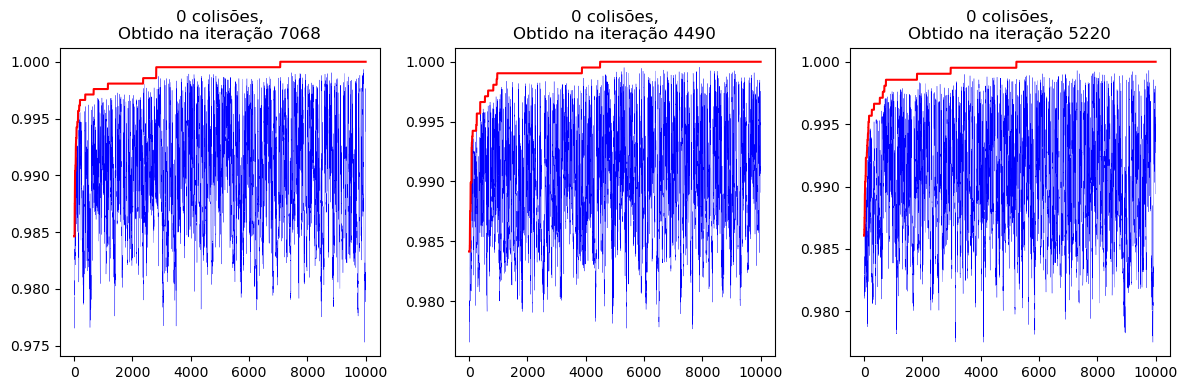

In [28]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
for i in range(3):
    j = i + 0
    colisoes = problem.objective_function(problem.decode(ambientes64[i].elite_population[0]))
    posicao = np.array(ambientes64[j].results_best).argmax()
    frase = str(colisoes)+' colisões' + ',\nObtido na iteração ' + str(posicao)
    sns.lineplot(ambientes64[j].results_mean,color='Blue',ax=axes[i],linewidth=0.2)
    sns.lineplot(ambientes64[j].results_best,color='Red',ax=axes[i]).set(title=frase)
plt.tight_layout()

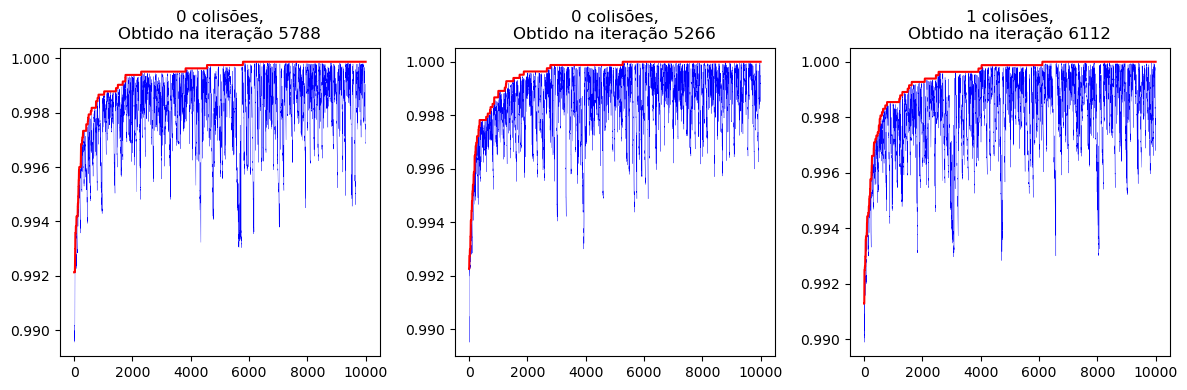

In [16]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
for i in range(3):
    j = i + 6
    colisoes = problem.objective_function(problem.decode(ambientes[i].elite_population[0]))
    posicao = np.array(ambientes[j].results_best).argmax()
    frase = str(colisoes)+' colisões' + ',\nObtido na iteração ' + str(posicao)
    sns.lineplot(ambientes[j].results_mean,color='Blue',ax=axes[i],linewidth=0.2)
    sns.lineplot(ambientes[j].results_best,color='Red',ax=axes[i]).set(title=frase)
plt.tight_layout()

161.125
[241  32 418 265 111  64 137  21]


<Axes: >

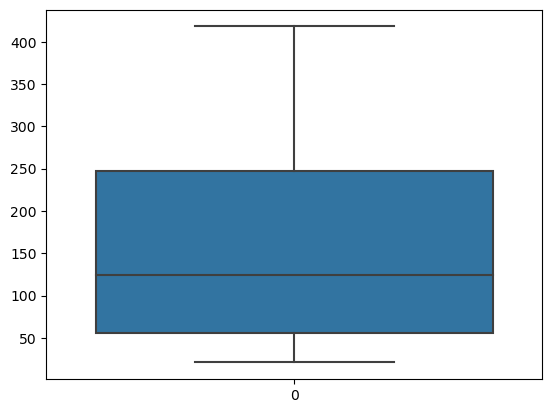

In [77]:
max_value = np.array([np.array(ambiente.results_best).argmax() for ambiente in ambientes][:-1])
print(max_value.mean())
print(max_value)
sns.boxplot(max_value)

    ESCREVER RUN

In [23]:
with open('data/runs/nrainhas128_10000_x10.ppkl','wb') as f:
    pickle.dump(ambientes,f)

PicklingError: Can't pickle <class 'scripts.problems.Nrainhas'>: it's not the same object as scripts.problems.Nrainhas

    CARREGAR RUN

In [19]:
mem_ambiente: list[Ambiente]
with open('data/runs/nrainhas128_5000_x10.ppkl','rb') as f:
    mem_ambiente = pickle.load(f)

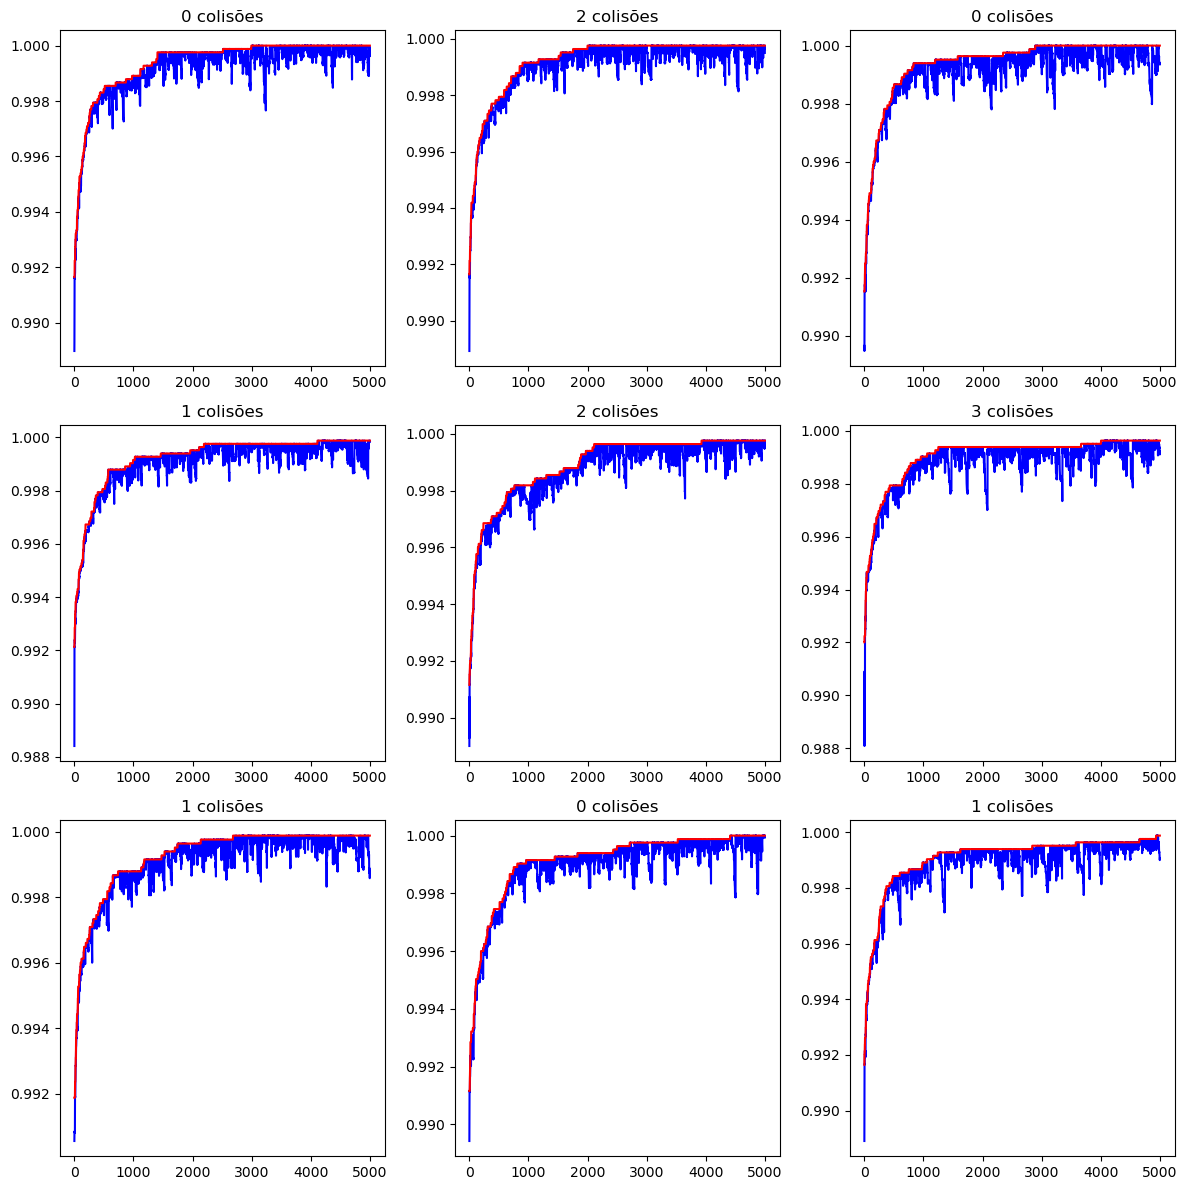

In [20]:
fig, axes = plt.subplots(3,3,figsize=(12,12))
for i in range(3):
    for j in range(3):
        k = i +j*3
        colisoes = problem.objective_function(problem.decode(mem_ambiente[k].elite_population[0]))
        sns.lineplot(mem_ambiente[k].results_mean,color='Blue',ax=axes[i][j])
        sns.lineplot(mem_ambiente[k].results_best,color='Red',ax=axes[i][j]).set(title=str(colisoes)+' colisões')
plt.tight_layout()

In [22]:
for i,ambiente in enumerate(mem_ambiente):
    colisoes = problem.objective_function(problem.decode(mem_ambiente[i].elite_population[0]))
    print('Run #',i,' Best=',np.array(ambiente.results_best).argmax(), 'Colisões =',colisoes)

Run # 0  Best= 2993 Colisões = 0
Run # 1  Best= 4112 Colisões = 1
Run # 2  Best= 2683 Colisões = 1
Run # 3  Best= 1998 Colisões = 2
Run # 4  Best= 3927 Colisões = 2
Run # 5  Best= 4410 Colisões = 0
Run # 6  Best= 2891 Colisões = 0
Run # 7  Best= 4003 Colisões = 3
Run # 8  Best= 4934 Colisões = 1
Run # 9  Best= 4508 Colisões = 1


In [12]:
for ambiente in ambientes:
    print('best:',ambiente.results_best)
    print('mean:',ambiente.results_mean)
    print('Solution:',ambiente.elite_population[0])
    print('Colisões:',problem.objective_function(problem.decode(ambiente.elite_population[0])))

best: [0.9916424418604651, 0.9916424418604651, 0.9916424418604651, 0.9916424418604651, 0.9920058139534884, 0.9920058139534884, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9927325581395349, 0.9927325581395349, 0.9927325581395349, 0.9927325581395349, 0.9929748062015504, 0.9929748062015504, 0.9929748062015504, 0.9929748062015504, 0.9930959302325582, 0.9932170542635659, 0.9932170542635659, 0.9932170542635659, 0.9932170542635659, 0.9932170542635659, 0.9932170542635659, 0.9932170542635659, 0.9932170542635659, 0.9932170542635659, 0.9932170542635659, 0.9932170542635659, 0.9933381782945736, 0.9933381782945736, 0.9933381782945736, 0.9933381782945736, 0.9933381782945736, 0.9933381782945736, 0.9933381782945736, 0.9933381782945736, 0.9933381782945736, 0.9933381782945736, 0.9933381782945736, 0.9938226744186046, 0.9938226744186046, 0.9938226744186046, 0.9938226744186046, 0.9938226744186046, 0.99382267441

    FUNÇÃO

In [3]:
config = Leitor().loadConfig('data/data_algebric.txt')
problem = AlgebricFunction(config)


ValueError: invalid literal for int() with base 10: '(-2'

    RADIO

In [52]:
config = Leitor().loadConfig('data/data_fabrica_de_radios.txt')
problem = FabricaDeRadios()

In [37]:
a = np.array([2,3,4,5,6,8])
print(a[:3],a[3:])

[2 3 4] [5 6 8]


0
100
200
300
400
500
600
700
800
900


<Axes: >

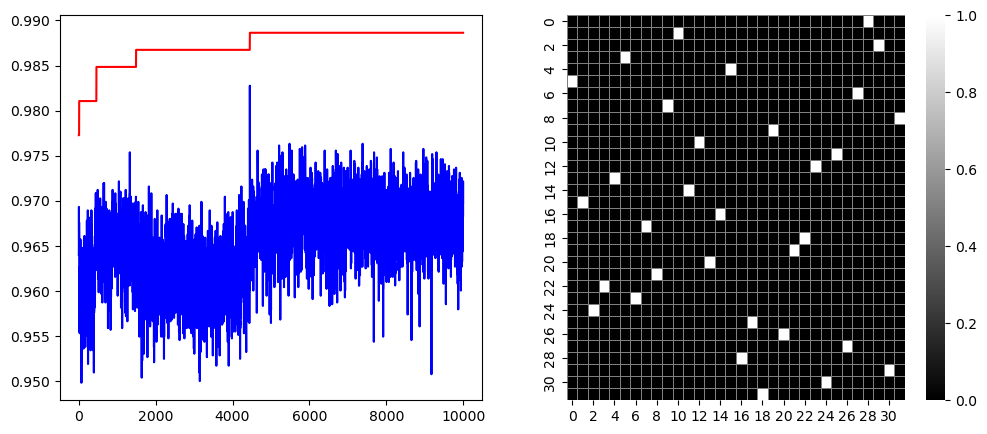

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(ambiente.results_best,color='Red',ax=ax[0])
sns.lineplot(ambiente.results_mean,color='Blue',ax=ax[0])
sns.heatmap(problem.get_matrix(problem.decode(ambiente.elite_population[0])),linewidths=0.5,linecolor='Gray',cmap='gray',ax=ax[1])

In [19]:
nrainhas.decode(ambiente.population[0])

[(0, 2), (1, 4), (2, 3), (3, 5), (4, 7), (5, 1), (6, 6), (7, 0)]

In [20]:
nrainhas.encode(nrainhas.decode(ambiente.population[0]))

array([2, 4, 3, 5, 7, 1, 6, 0])

In [48]:
eval('[2,4]')[1]

4

In [4]:
DIM = 11
eval('[i for i in range(DIM)]')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]